<a href="https://colab.research.google.com/github/junhan-kim/Deep-Learning-Practice/blob/master/18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [0]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [0]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5)) 
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
___________________________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 38s 2ms/step - loss: 0.4637 - acc: 0.7613 - val_loss: 0.3433 - val_acc: 0.8493
Epoch 2/5
22800/25000 [==========================>...] - ETA: 2s - loss: 0.2928 - acc: 0.8760

25000/25000 [==============================] - 38s 2ms/step - loss: 0.2948 - acc: 0.8751 - val_loss: 0.3230 - val_acc: 0.8580
Epoch 3/5
25000/25000 [==============================] - 38s 2ms/step - loss: 0.2494 - acc: 0.8994 - val_loss: 0.3277 - val_acc: 0.8572
Epoch 4/5
12100/25000 [=============>................] - ETA: 15s - loss: 0.2059 - acc: 0.9213

25000/25000 [==============================] - 38s 2ms/step - loss: 0.2173 - acc: 0.9134 - val_loss: 0.3341 - val_acc: 0.8552
Epoch 5/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.1806 - acc: 0.9316 - val_loss: 0.3518 - val_acc: 0.8529


In [0]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test) [1]))

25000/25000 [==============================] - 10s 385us/step

 Test Accuracy: 0.8529


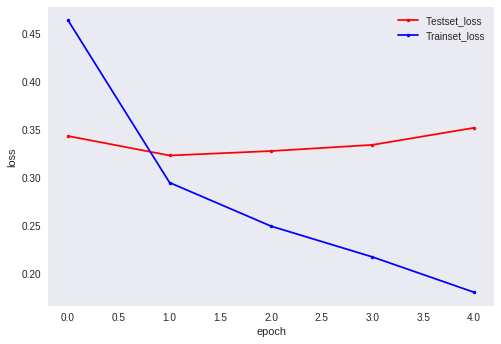

In [0]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()